## Описание датасета

Датасет представляет собой данные о предоставлении займов населению. Главной целью является определить приемлемость предоставления займа по следующим параметрам:

1) пол,  
2) семейное положение,  
3) количество иждивенцев,  
4) образование,  
5) статус самозанятости,  
6) доход заемщика,  
7) доход созаемщика,  
8) размер займа,  
9) срок предоставления займа,  
10) статус кредитной истории ("плохая" или "хорошая"),  
11) тип места проживания.

## Подключение необходимых библиотек

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings

warnings.simplefilter('ignore')

%matplotlib inline

## Чтение данных

Считаем данные и проверим основные характеристики.

In [2]:
data = pd.read_csv('./all_data.csv')

In [3]:
data.describe(include='all')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Loan_Amount_Term,Credit_History,Area,Loan_Status
count,981,955,978,956,980,926,979.000000,980.000000,954.000000,961.000000,902.000000,981,981
unique,981,2,2,4,2,2,NaN,NaN,NaN,NaN,NaN,3,2
top,LP001002,Male,Yes,0,Graduate,No,NaN,NaN,NaN,NaN,NaN,Semiurban,Y
freq,1,773,631,545,762,807,NaN,NaN,NaN,NaN,NaN,349,730
mean,NaN,NaN,NaN,NaN,NaN,NaN,5180.639428,1601.673388,142.511530,342.201873,0.835920,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,5700.888035,2720.150344,77.421743,65.100602,0.370553,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,9.000000,6.000000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,2874.000000,0.000000,100.000000,360.000000,1.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,3791.000000,1106.500000,126.000000,360.000000,1.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,5523.000000,2365.500000,162.000000,360.000000,1.000000,NaN,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 981 entries, 0 to 980
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Loan_ID             981 non-null    object 
 1   Gender              955 non-null    object 
 2   Married             978 non-null    object 
 3   Dependents          956 non-null    object 
 4   Education           980 non-null    object 
 5   Self_Employed       926 non-null    object 
 6   Applicant_Income    979 non-null    float64
 7   Coapplicant_Income  980 non-null    float64
 8   Loan_Amount         954 non-null    float64
 9   Loan_Amount_Term    961 non-null    float64
 10  Credit_History      902 non-null    float64
 11  Area                981 non-null    object 
 12  Loan_Status         981 non-null    object 
dtypes: float64(5), object(8)
memory usage: 99.8+ KB


Видно, что у одного столбца (`Credit_History`) неверно определился тип данных.  
Это столбец, содержащий бинарный признак, поэтому необходимо поменять тип на `object`.

In [5]:
data['Credit_History'] = data['Credit_History'].astype('object', errors='ignore')

In [6]:
data.describe(include='all')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Loan_Amount_Term,Credit_History,Area,Loan_Status
count,981,955,978,956,980,926,979.000000,980.000000,954.000000,961.000000,902.0,981,981
unique,981,2,2,4,2,2,NaN,NaN,NaN,NaN,2.0,3,2
top,LP001002,Male,Yes,0,Graduate,No,NaN,NaN,NaN,NaN,1.0,Semiurban,Y
freq,1,773,631,545,762,807,NaN,NaN,NaN,NaN,754.0,349,730
mean,NaN,NaN,NaN,NaN,NaN,NaN,5180.639428,1601.673388,142.511530,342.201873,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,5700.888035,2720.150344,77.421743,65.100602,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,9.000000,6.000000,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,2874.000000,0.000000,100.000000,360.000000,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,3791.000000,1106.500000,126.000000,360.000000,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,5523.000000,2365.500000,162.000000,360.000000,NaN,NaN,NaN


Отобразим диаграммы рассеяния.

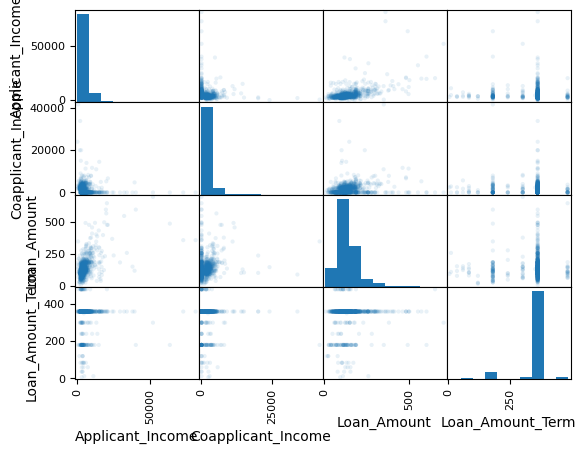

In [7]:
from pandas.plotting import scatter_matrix

scatter_matrix(data, alpha=0.1)
pass

Найдем количество и процент пропущенных значений.

In [8]:
data.shape[0] - data.count()

Loan_ID                0
Gender                26
Married                3
Dependents            25
Education              1
Self_Employed         55
Applicant_Income       2
Coapplicant_Income     1
Loan_Amount           27
Loan_Amount_Term      20
Credit_History        79
Area                   0
Loan_Status            0
dtype: int64

In [9]:
100 * (1 - data.count().sum() / (data.shape[0] * data.shape[1]))

1.8740688465459066

Отобразим матрицу корреляции.

In [10]:
data.corr(numeric_only=True)

,Applicant_Income,Coapplicant_Income,Loan_Amount,Loan_Amount_Term
Applicant_Income,1.000000,-0.114268,0.551810,-0.023049
Coapplicant_Income,-0.114268,1.000000,0.179284,-0.043888
Loan_Amount,0.551810,0.179284,1.000000,0.055636
Loan_Amount_Term,-0.023049,-0.043888,0.055636,1.000000


<AxesSubplot: >

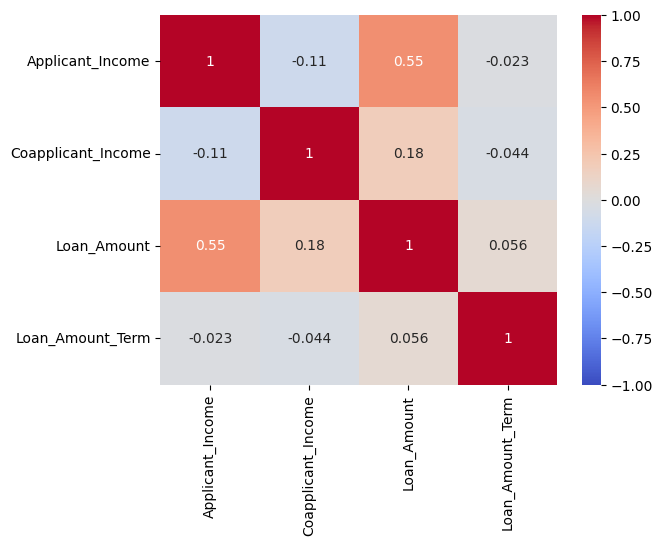

In [11]:
import seaborn as sns

sns.heatmap(data.corr(numeric_only=True), annot=True, cmap='coolwarm', vmin=-1, vmax=1)

Из матрицы корреляции видно, что существует некая зависимость между данными в столбцах `Applicant_Income` и `Loan_Amount`.  
Отобразим эти данные на графике.

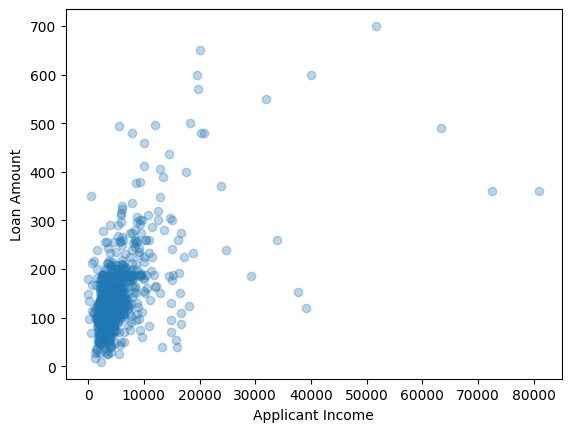

In [12]:
plt.plot(data['Applicant_Income'], data['Loan_Amount'], 'o', alpha=0.3)
plt.xlabel('Applicant Income')
plt.ylabel('Loan Amount')
pass

## Предобработка данных ##

Удаляем столбец с ID записи

In [13]:
data = data.drop('Loan_ID', axis=1)

Заполняем пропущенные значения:
* для столбцов с числовыми признаками подставляем медианное значение  
* для столбцов с категориальными признаками подставляем значение моды

In [14]:
numerical_columns = [c for c in data.columns if data[c].dtype.name != 'object']
categorical_columns = [c for c in data.columns if data[c].dtype.name == 'object']
categorical_columns.remove('Loan_Status')
print(*numerical_columns)
print(*categorical_columns)

Applicant_Income Coapplicant_Income Loan_Amount Loan_Amount_Term
Gender Married Dependents Education Self_Employed Credit_History Area


In [15]:
for c in numerical_columns:
    data[c] = data[c].fillna(data[c].median())

In [16]:
for c in categorical_columns:
    data[c] = data[c].fillna(data[c].mode(dropna=True)[0], downcast=False)

In [17]:
data.describe(include='all')

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Loan_Amount_Term,Credit_History,Area,Loan_Status
count,981,981,981,981,981,981.000000,981.000000,981.000000,981.000000,981.0,981,981
unique,2,2,4,2,2,NaN,NaN,NaN,NaN,2.0,3,2
top,Male,Yes,0,Graduate,No,NaN,NaN,NaN,NaN,1.0,Semiurban,Y
freq,799,634,570,763,862,NaN,NaN,NaN,NaN,833.0,349,730
mean,NaN,NaN,NaN,NaN,NaN,5177.806320,1601.168624,142.057085,342.564730,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,5695.413118,2718.808125,76.395592,64.482011,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,9.000000,6.000000,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,2875.000000,0.000000,101.000000,360.000000,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,3791.000000,1106.500000,126.000000,360.000000,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,5516.000000,2365.000000,160.000000,360.000000,NaN,NaN,NaN


Теперь обработаем выбросы.
Построим бокс-диаграммы для количественных признаков.

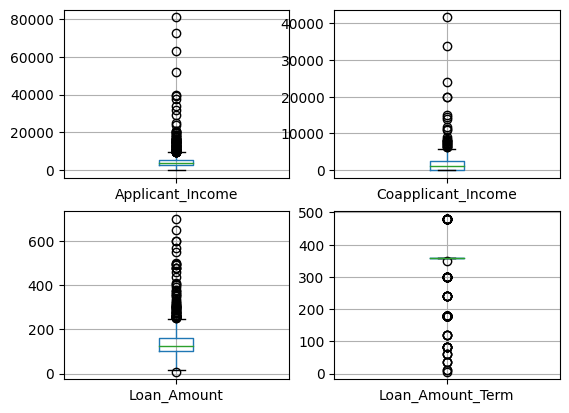

In [18]:
fig, axes = plt.subplots(2, 2)

for i, c in enumerate(sorted(data[numerical_columns])):
    data[numerical_columns].boxplot(column=c, ax=axes[i // 2, i % 2])

pass

Можно увидеть большое количество выбросов в столбцах `Applicant_Income`, `Coapplicant_Income` и `Loan_Amount`.  
Удалим все строки, данные в которых не попадают в пределы квантилей 0.1 и 0.99.

In [19]:
for c in numerical_columns:
    data.loc[(data[c] < data[c].quantile(0.01)) | (data[c] > data[c].quantile(0.99))] = np.nan
data = data.dropna()

In [20]:
data.shape

(922, 12)

Теперь обработаем столбцы с категориальными признаками.  
Для бинарных признаков поменяем их значения на `0` и `1` соответственно.  
Для категориальных признаков применим метод векторизации.

In [21]:
binary_columns = [c for c in categorical_columns if len(data[c].unique()) == 2]
nonbinary_columns = [c for c in categorical_columns if len(data[c].unique()) > 2]
print(*binary_columns)
print(*nonbinary_columns)

Gender Married Education Self_Employed Credit_History
Dependents Area


In [22]:
data_binary = data[binary_columns].copy()

for c in binary_columns:
    unique = data_binary[c].unique()
    data_binary.loc[data_binary[c] == unique[0], c] = 1
    data_binary.loc[data_binary[c] == unique[1], c] = 0

In [23]:
data_nonbinary = pd.get_dummies(data[nonbinary_columns])
print(data_nonbinary.columns)

Index(['Dependents_0', 'Dependents_1', 'Dependents_2', 'Dependents_3+',
       'Area_Rural', 'Area_Semiurban', 'Area_Urban'],
      dtype='object')


Теперь нормализуем количественные признаки.  
Каждый количественный признак приведем к нулевому среднему и единичному среднеквадратичному отклонению.

In [24]:
data_numerical = data[numerical_columns]
data_numerical = (data_numerical - data_numerical.mean(axis=0)) / data_numerical.std(axis=0)

Объединим преобразованные данные.

In [25]:
data = pd.concat((data_numerical, data_binary, data_nonbinary, data['Loan_Status']), axis=1)
print(data.shape)
data.describe()

(922, 17)


,Applicant_Income,Coapplicant_Income,Loan_Amount,Loan_Amount_Term,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Area_Rural,Area_Semiurban,Area_Urban
count,9.220000e+02,9.220000e+02,9.220000e+02,9.220000e+02,922.000000,922.000000,922.000000,922.000000,922.000000,922.000000,922.000000
mean,-1.541307e-17,6.935884e-17,-2.254162e-16,-1.888102e-16,0.586768,0.159436,0.163774,0.090022,0.299349,0.352495,0.348156
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.492681,0.366281,0.370272,0.286368,0.458222,0.478006,0.476644
min,-1.225062e+00,-8.642738e-01,-1.811091e+00,-4.716797e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-5.949938e-01,-8.642738e-01,-6.251222e-01,2.449357e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-2.949373e-01,-1.862638e-01,-1.758918e-01,2.449357e-01,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.249024e-01,5.787668e-01,4.350617e-01,2.449357e-01,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
max,6.775994e+00,4.352584e+00,4.837520e+00,2.402211e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## X, y, обучающая и тестовая выборки

Разделим данные на независимые признаки (`X`) и целевую переменную (`y`).

In [26]:
X = data.drop('Loan_Status', axis=1)
y = data['Loan_Status']
feature_names = X.columns
print(feature_names)

Index(['Applicant_Income', 'Coapplicant_Income', 'Loan_Amount',
       'Loan_Amount_Term', 'Gender', 'Married', 'Education', 'Self_Employed',
       'Credit_History', 'Dependents_0', 'Dependents_1', 'Dependents_2',
       'Dependents_3+', 'Area_Rural', 'Area_Semiurban', 'Area_Urban'],
      dtype='object')


In [27]:
X = X.to_numpy()
print(X.shape)

y = y.to_numpy()
print(y.shape)

(922, 16)
(922,)


Теперь разделим данные на обучающую и тестовую выборки в соотношении 4/1.

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=993)

N_train, _ = X_train.shape
N_test, _ = X_test.shape
print(N_train, N_test)

737 185


## Метод $k$ ближайших соседей

In [29]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

knn = KNeighborsClassifier()
knn = knn.fit(X_train, y_train)

err_train = np.mean(y_train != knn.predict(X_train))
err_test = np.mean(y_test != knn.predict(X_test))

print(confusion_matrix(y_train, knn.predict(X_train)))
print(confusion_matrix(y_test, knn.predict(X_test)))
print(err_train, err_test)

[[ 78 101]
 [  8 550]]
[[ 17  37]
 [  2 129]]
0.14789687924016282 0.21081081081081082


Подберем лучший параметр `n_neighbors`.

In [30]:
from sklearn.model_selection import GridSearchCV
nnb = [_ for _ in range(1, 101)]
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid={'n_neighbors': nnb})
grid.fit(X_train, y_train)

print(1 - grid.best_score_, grid.best_estimator_.n_neighbors)

0.18179812465526746 6


In [31]:
knn = grid.best_estimator_

err_train = np.mean(y_train != knn.predict(X_train))
err_test = np.mean(y_test != knn.predict(X_test))


print(confusion_matrix(y_train, knn.predict(X_train)))
print(confusion_matrix(y_test, knn.predict(X_test)))
print(err_train, err_test)

[[ 88  91]
 [ 16 542]]
[[ 21  33]
 [  5 126]]
0.1451831750339213 0.20540540540540542


## SVC ##

In [32]:
from sklearn.svm import SVC

svc = SVC().fit(X_train, y_train)

err_train = np.mean(y_train != svc.predict(X_train))
err_test = np.mean(y_test != svc.predict(X_test))

print(confusion_matrix(y_train, svc.predict(X_train)))
print(confusion_matrix(y_test, svc.predict(X_test)))
print(err_train, err_test)

[[107  72]
 [  5 553]]
[[ 31  23]
 [  1 130]]
0.1044776119402985 0.12972972972972974


Подберем лучшие параметры `C` и `gamma`.

In [33]:
from sklearn.model_selection import GridSearchCV

C_array = 10.0 ** np.arange(-5, 5)
gamma_array = 10.0 ** np.arange(-5, 5)
svc = SVC(gamma='auto')
grid = GridSearchCV(svc, param_grid={'C': C_array, 'gamma': gamma_array})
grid.fit(X_train, y_train)

print(1 - grid.best_score_, grid.best_estimator_.C, grid.best_estimator_.gamma)

0.10856775142489428 1.0 0.01


In [34]:
svc = grid.best_estimator_

err_train = np.mean(y_train != svc.predict(X_train))
err_test = np.mean(y_test != svc.predict(X_test))

print(confusion_matrix(y_train, svc.predict(X_train)))
print(confusion_matrix(y_test, svc.predict(X_test)))
print(err_train, err_test)

[[103  76]
 [  4 554]]
[[ 33  21]
 [  1 130]]
0.10854816824966079 0.11891891891891893


## Random Forest

In [35]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier().fit(X_train, y_train)

err_train = np.mean(y_train != rf.predict(X_train))
err_test = np.mean(y_test != rf.predict(X_test))

print(confusion_matrix(y_train, rf.predict(X_train)))
print(confusion_matrix(y_test, rf.predict(X_test)))
print(err_train, err_test)

[[178   1]
 [  0 558]]
[[ 33  21]
 [  3 128]]
0.0013568521031207597 0.12972972972972974


## Extremely Randomized Trees

In [36]:
from sklearn.ensemble import ExtraTreesClassifier

ert = ExtraTreesClassifier().fit(X_train, y_train)

err_train = np.mean(y_train != ert.predict(X_train))
err_test  = np.mean(y_test != ert.predict(X_test))

print(confusion_matrix(y_train, ert.predict(X_train)))
print(confusion_matrix(y_test, ert.predict(X_test)))
print(err_train, err_test)

[[179   0]
 [  1 557]]
[[ 33  21]
 [  7 124]]
0.0013568521031207597 0.15135135135135136


## AdaBoost

In [37]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier().fit(X_train, y_train)

err_train = np.mean(y_train != ada.predict(X_train))
err_test  = np.mean(y_test != ada.predict(X_test))

print(confusion_matrix(y_train, ada.predict(X_train)))
print(confusion_matrix(y_test, ada.predict(X_test)))
print(err_train, err_test)

[[114  65]
 [  6 552]]
[[ 33  21]
 [  3 128]]
0.09633649932157395 0.12972972972972974


## GBT

In [38]:
from sklearn.ensemble import GradientBoostingClassifier

gbt = GradientBoostingClassifier().fit(X_train, y_train)

err_train = np.mean(y_train != gbt.predict(X_train))
err_test  = np.mean(y_test != gbt.predict(X_test))

print(confusion_matrix(y_train, gbt.predict(X_train)))
print(confusion_matrix(y_test, gbt.predict(X_test)))
print(err_train, err_test)

[[131  48]
 [  0 558]]
[[ 33  21]
 [  4 127]]
0.06512890094979647 0.13513513513513514


## Выводы

В ходе данной работы были изучены основные методы обработки данных для использования их в алгоритмах машинного обучения, а именно:

1) методы визуализации данных,  
2) методы обработки пропущенных значений,  
3) методы обработки выбросов,  
4) методы обработки количественных признаков (нормализация),  
5) методы обработки категориальных признаков (векторизация),  
6) методы разбиения данных на обучабщую и тестовую выборки.

Также были изучены следующие методы машинного обучения:

1) метод $k$ ближайших соседей,  
2) метод опорных векторов,  
3) методы случайных лесов,  
4) метод адаптивного бустинга,  
5) метод градиентного бустинга.

Из полученных результатов можно сделать следующие выводы:

1) лучшим методом на тестовой выборке стал метод опорных векторов с процентом ошибки $11.89\%$,  
2) методы случайных лесов показывают очень хорошие результаты на обучающей выборке ($<1\%$ ошибок), однако на тестовой выборке их результат сильно ухудшается, что свидетельствует о переобучении.

## LogisticRegression

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay

logreg = LogisticRegression().fit(X_train, y_train)

err_train = np.mean(y_train != logreg.predict(X_train))
err_test = np.mean(y_test != logreg.predict(X_test))

print(confusion_matrix(y_train, logreg.predict(X_train)))
print(confusion_matrix(y_test, logreg.predict(X_test)))
print(err_train, err_test)

[[103  76]
 [  4 554]]
[[ 33  21]
 [  1 130]]
0.10854816824966079 0.11891891891891893


## Random Forest

In [40]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier().fit(X_train, y_train)

err_train = np.mean(y_train != rf.predict(X_train))
err_test = np.mean(y_test != rf.predict(X_test))

print(confusion_matrix(y_train, rf.predict(X_train)))
print(confusion_matrix(y_test, rf.predict(X_test)))
print(err_train, err_test)

[[178   1]
 [  0 558]]
[[ 33  21]
 [  3 128]]
0.0013568521031207597 0.12972972972972974


## MLPClassifier

In [41]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import ConfusionMatrixDisplay

mlp = MLPClassifier(alpha=0.0001, hidden_layer_sizes=(10,), activation='logistic', solver='lbfgs', max_iter=1000, random_state=42).fit(X_train, y_train)

err_train = np.mean(y_train != mlp.predict(X_train))
err_test = np.mean(y_test != mlp.predict(X_test))

print(confusion_matrix(y_train, mlp.predict(X_train)))
print(confusion_matrix(y_test, mlp.predict(X_test)))
print(err_train, err_test)

[[136  43]
 [  1 557]]
[[ 31  23]
 [ 11 120]]
0.05970149253731343 0.1837837837837838


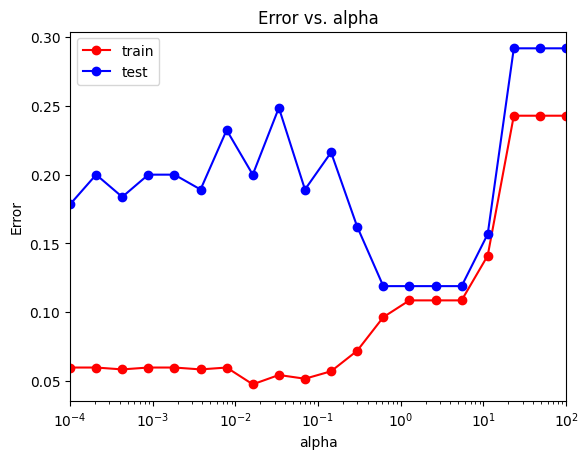

In [42]:
alpha_arr = np.logspace(-4, 2, 20)
train_err = []
test_err = []

for alpha in alpha_arr:
    mlp = MLPClassifier(alpha=alpha, hidden_layer_sizes=(10,), activation='logistic', solver='lbfgs', random_state=42).fit(X_train, y_train)
    y_train_pred = mlp.predict(X_train)
    y_test_pred = mlp.predict(X_test)
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))

plt.semilogx(alpha_arr, train_err, 'r-o', label='train')
plt.semilogx(alpha_arr, test_err, 'b-o', label='test')
plt.xlim([np.min(alpha_arr), np.max(alpha_arr)])
plt.title('Error vs. alpha')
plt.xlabel('alpha')
plt.ylabel('Error')
plt.legend()
pass

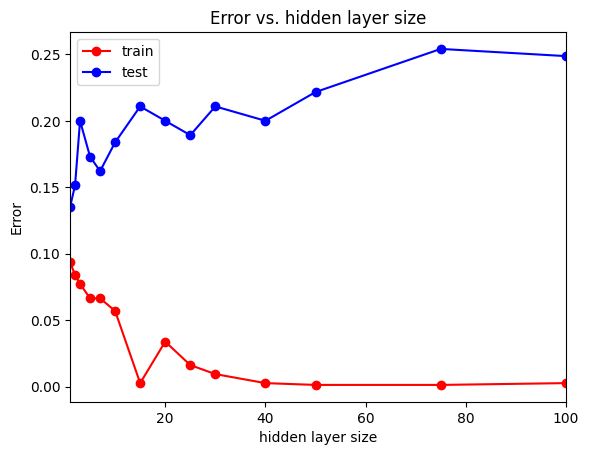

In [43]:
layer_arr = (1, 2, 3, 5, 7, 10, 15, 20, 25, 30, 40, 50, 75, 100)
train_err = []
test_err = []

for layer in layer_arr:
    mlp = MLPClassifier(alpha=0.001, hidden_layer_sizes=(layer,), activation='logistic', solver='lbfgs', random_state=42).fit(X_train, y_train)
    y_train_pred = mlp.predict(X_train)
    y_test_pred = mlp.predict(X_test)
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))

plt.plot(layer_arr, train_err, 'r-o', label='train')
plt.plot(layer_arr, test_err, 'b-o', label='test')
plt.xlim([np.min(layer_arr), np.max(layer_arr)])
plt.title('Error vs. hidden layer size')
plt.xlabel('hidden layer size')
plt.ylabel('Error')
plt.legend()
pass

In [44]:
from sklearn.model_selection import GridSearchCV
from itertools import product, chain
from sklearn.metrics import ConfusionMatrixDisplay

hidden_layers_arr = tuple(chain.from_iterable(tuple(product((1, 5, 10, 25, 50, 100), repeat=_)) for _ in (1, 2)))
alpha_arr = 10.0 ** np.logspace(-4, 2, 20)
activation_arr = ['logistic']
solver_arr = ['lbfgs']
grid = GridSearchCV(MLPClassifier(max_iter=1000, random_state=42), param_grid={'hidden_layer_sizes': hidden_layers_arr, 'alpha': alpha_arr, 'activation': activation_arr, 'solver': solver_arr}, n_jobs=12).fit(X_train, y_train)

mlp = grid.best_estimator_
err_train = np.mean(y_train != mlp.predict(X_train))
err_test = np.mean(y_test != mlp.predict(X_test))

print(confusion_matrix(y_train, mlp.predict(X_train)))
print(confusion_matrix(y_test, mlp.predict(X_test)))
print(err_train, err_test)

[[103  76]
 [  4 554]]
[[ 33  21]
 [  1 130]]
0.10854816824966079 0.11891891891891893


## Выводы

Были дополнительно изучены следующие алгоритмы машинного обучения:

1) логистическая регрессия,
2) случайный лес,
3) полносвязная нейронная сеть.

Из полученных результатов можно сделать следующие выводы:

1) лучшим алгоритмом на тестовой выборке стала логистическая регрессия с процентом ошибки $11.89\%$, что совпадает с лучшей ошибкой, полученной для набора предыдущих классификаторов (а именно для машины опорных векторов),
2) для любых параметров ошибка полносвязной нейронной сети на тестовой выборке больше, чем ошибка логистической регрессии, причем эта ошибка уменьшается и стремится к ошибке логистической регрессии при уменьшении размера скрытого слоя,
3) при увеличении размера скрытого слоя полносвязной нейронной сети ошибка на обучающей выборке уменьшается вплоть до значений, близких к нулю, а на тестовой выборке увеличивается, что говорит о переобучении.